"Anatomy of a Hit: Deconstructing the Features of Spotify’s Most Popular Tracks"

The aim of this analysis is to explore the "anatomy of a hit" – to uncover the key elements that make some songs extremely popular on Spotify and maybe identify artists who have the potential to become the next big stars.

I plan to carry out an in-depth analysis of the features of the most popular songs, examine changes in listener preferences over recent years, and identify emerging trends and musical niches. I will be using tools such as pandas for data processing, and matplotlib and seaborn for creating visualizations.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') # styl wykresów
pd.set_option('display.max_columns', None) # wyświetlanie wszystkich kolumn

df_raw = pd.read_csv('Final database.csv')

C:\Users\48668\AppData\Local\Temp\ipykernel_13848\3332720863.py:8: DtypeWarning: Columns (7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('Final database.csv')


In [3]:
df_raw.head()

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,album,compilation,single,bolero,boy band,country,dance/electronic,else,funk,hip hop,house,indie,jazz,k-pop,latin,metal,opm,pop,r&b/soul,rap,reggae,reggaeton,rock,trap,syuzhet_norm,bing_norm,afinn_norm,nrc_norm,syuzhet,bing,afinn,nrc,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,n_words,anger_norm,anticipation_norm,disgust_norm,fear_norm,joy_norm,sadness_norm,surprise_norm,trust_norm,negative_norm,positive_norm,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2,negative_norm2,positive_norm2,negative_bog_jr,positive_bog_jr,Bayes,Negative_Bayes,Neutral_Bayes,Positive_Bayes,LDA_Topic,Celebrate,Desire,Explore,Fun,Hope,Love,Nostalgia,Thug,bing_norm_negative,bing_norm_neutral,bing_norm_positive,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Denmark,Ecuador,Finland,France,Germany,Global,Indonesia,Ireland,Italy,Malaysia,Mexico,Netherlands,New Zealand,Norway,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y 

In [4]:
len(df_raw)

170633

In [5]:
numerical_cols = df_raw.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_raw.select_dtypes(include=['object', 'category']).columns.tolist()

print(f'Numerica Columns: {len(numerical_cols)}')
print(numerical_cols)

print(f'\nCategorical Columns: {len(categorical_cols)}')
print(categorical_cols)

Numerica Columns: 123
['Popularity', 'Days_since_release', 'Released_after_2017', 'Explicit_false', 'Explicit_true', 'album', 'compilation', 'single', 'bolero', 'boy band', 'country', 'dance/electronic', 'else', 'funk', 'hip hop', 'house', 'indie', 'jazz', 'k-pop', 'latin', 'metal', 'opm', 'pop', 'r&b/soul', 'rap', 'reggae', 'reggaeton', 'rock', 'trap', 'syuzhet_norm', 'bing_norm', 'afinn_norm', 'nrc_norm', 'syuzhet', 'bing', 'afinn', 'nrc', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust', 'negative', 'positive', 'n_words', 'anger_norm', 'anticipation_norm', 'disgust_norm', 'fear_norm', 'joy_norm', 'sadness_norm', 'surprise_norm', 'trust_norm', 'negative_norm', 'positive_norm', 'anger_norm2', 'anticipation_norm2', 'disgust_norm2', 'fear_norm2', 'joy_norm2', 'sadness_norm2', 'surprise_norm2', 'trust_norm2', 'negative_norm2', 'positive_norm2', 'negative_bog_jr', 'positive_bog_jr', 'Bayes', 'Negative_Bayes', 'Neutral_Bayes', 'Positive_Bayes', 'Celebrate',

In [6]:
print('Brakujące wartości:\n\n{}'.format((df_raw.isnull().sum()/len(df_raw)*100).sort_values(ascending=False).to_string(float_format='{:.2f}%'.format)))

Brakujące wartości:

anger_norm2           58.16%
trust_norm2           58.16%
anticipation_norm2    58.16%
disgust_norm2         58.16%
fear_norm2            58.16%
joy_norm2             58.16%
surprise_norm2        58.16%
sadness_norm2         58.16%
negative_norm2        58.13%
positive_norm2        58.13%
nrc_norm              57.88%
anticipation          57.88%
disgust               57.88%
fear                  57.88%
anger                 57.88%
nrc                   57.88%
afinn                 57.88%
bing                  57.88%
syuzhet               57.88%
anticipation_norm     57.88%
afinn_norm            57.88%
bing_norm             57.88%
syuzhet_norm          57.88%
LDA_Topic             57.88%
sadness               57.88%
Celebrate             57.88%
Desire                57.88%
Explore               57.88%
joy                   57.88%
anger_norm            57.88%
surprise              57.88%
sadness_norm          57.88%
Bayes                 57.88%
positive_bog_jr       

In [7]:
print(len(pd.unique(df_raw['Genre'])))
print(len(pd.unique(df_raw['Genre_new'])))

1120
21


In [8]:
df_raw = df_raw.drop(['Genre'], axis=1)
df_raw =df_raw.rename(columns={'Genre_new':'Genre'})

In [9]:
print(df_raw['Release_date'].head())

0    2018-11-05
1    2018-11-05
2    2018-11-05
3    2018-11-05
4    2018-11-05
Name: Release_date, dtype: object


In [10]:
from datetime import datetime

def get_season(date):
    month = date.month
    if month in [3,4,5]:
        return "Spring"
    elif month in [6,7,8]:
        return "Summer"
    elif month in [9,10,11]:
        return "Autumn"
    else:
        return "Winter"

df_raw['Release_date'] = pd.to_datetime(df_raw['Release_date'], format="%Y-%m-%d", errors='coerce')
df_raw['release_season'] = df_raw['Release_date'].apply(get_season)


In [ ]:
#  we're only interested in the biggest hits, so I'm filtering only those records that have ever been in the top 10 in any country
df_hits = df_raw[df_raw['Top10_dummy']==1]

In [12]:
df_hits['Popularity'].describe()

count     14851.000000
mean      29042.335961
std       27445.928572
min         248.300000
25%        7989.925000
50%       20995.600000
75%       42074.800000
max      233766.900000
Name: Popularity, dtype: float64

In [13]:
threshold = df_hits['Popularity'].quantile(0.75)  # dla górnych 25% rekordów na podstawie popularności
df_hits = df_hits[df_hits['Popularity'] >= threshold]

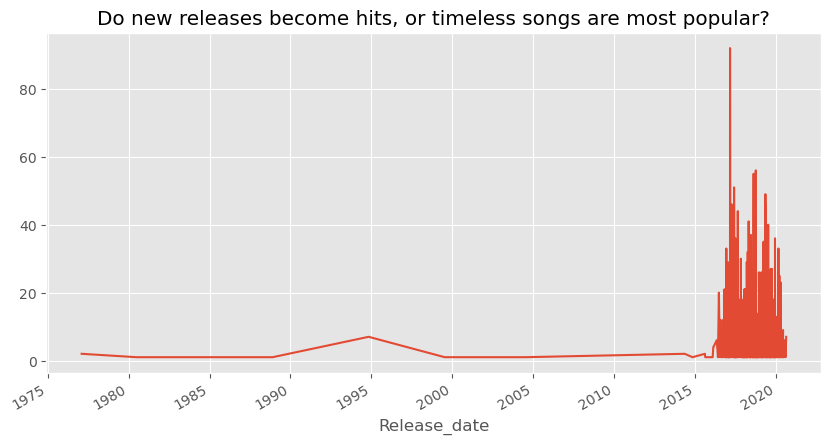

In [14]:
df_hits['Release_date'].value_counts().sort_index().plot(kind='line', figsize=(10,5))
plt.title('Do new releases become hits, or timeless songs are most popular?')
plt.show()

In [ ]:
# Most hits come from recent years (since 2015), which suggests that new releases have a higher chance of becoming popular.
# However, there are also a few songs from the 60s, 70s, and 80s that are considered hits.
# The sudden increase in hits after 2015 may be due to the rise in popularity of streaming platforms, which promote new tracks.

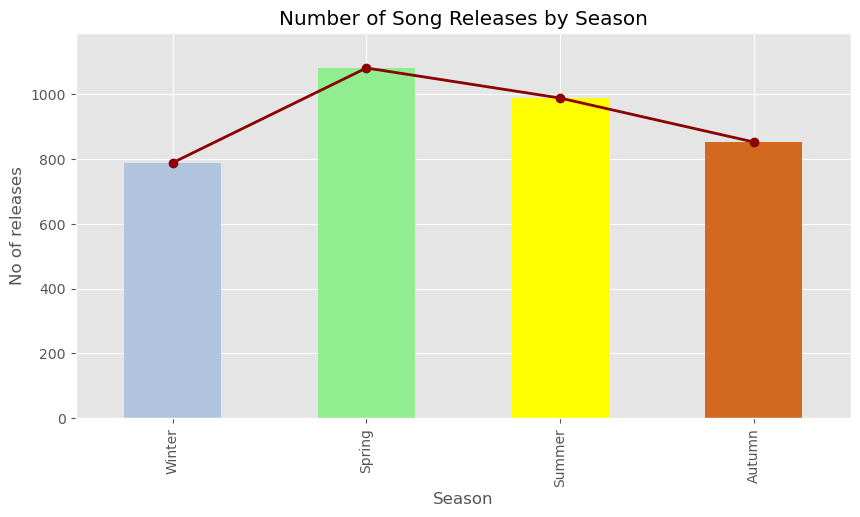

In [16]:
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
colors = ['#B0C4DE', '#90EE90', '#FFFF00', '#D2691E']

data = df_hits['release_season'].value_counts().reindex(season_order)
data.plot(kind='bar', figsize=(10,5), color = colors)

values = data.values
plt.plot(range(len(season_order)), values, color='darkred', marker='o', linewidth=2)
plt.ylim(0, max(values) * 1.1)

plt.title('Number of Song Releases by Season')
plt.xlabel('Season')
plt.ylabel('No of releases')
plt.show()

In [ ]:
# I'm comparing the average values of features such as 'danceability', 'energy', 'loudness', and 'tempo' between hits and other songs:

df_non_hits =  df_raw[~df_raw['Title'].isin(df_hits['Title'])] # The tilde (~) indicates negation, meaning I'm selecting the records that are not hits

features = ['danceability', 'energy', 'loudness', 'tempo','speechiness', 'acoustics', 'instrumentalness', 'liveliness']

hits = df_hits[features].apply(pd.to_numeric, errors='coerce') 
non_hits = df_non_hits[features].apply(pd.to_numeric, errors='coerce') 

print(len(hits))
print(len(non_hits))

3713
149831


In [19]:
from sklearn.utils import resample
non_hits = resample(non_hits, n_samples=len(hits), random_state=42)
print(len(non_hits))

3713


In [20]:
hits_means = hits[features].mean()
non_hits_means = non_hits[features].mean()  

comparison = pd.DataFrame({
    'Hits': hits_means,
    'Other': non_hits_means
})

print(comparison)

                        Hits       Other
danceability        0.709051    0.664388
energy              0.658146    0.638464
loudness           -5.719445   -6.673683
tempo             119.454665  121.173172
speechiness         0.110046    0.126993
acoustics           0.240802    0.246696
instrumentalness    0.007463    0.016342
liveliness          0.163922    0.181120


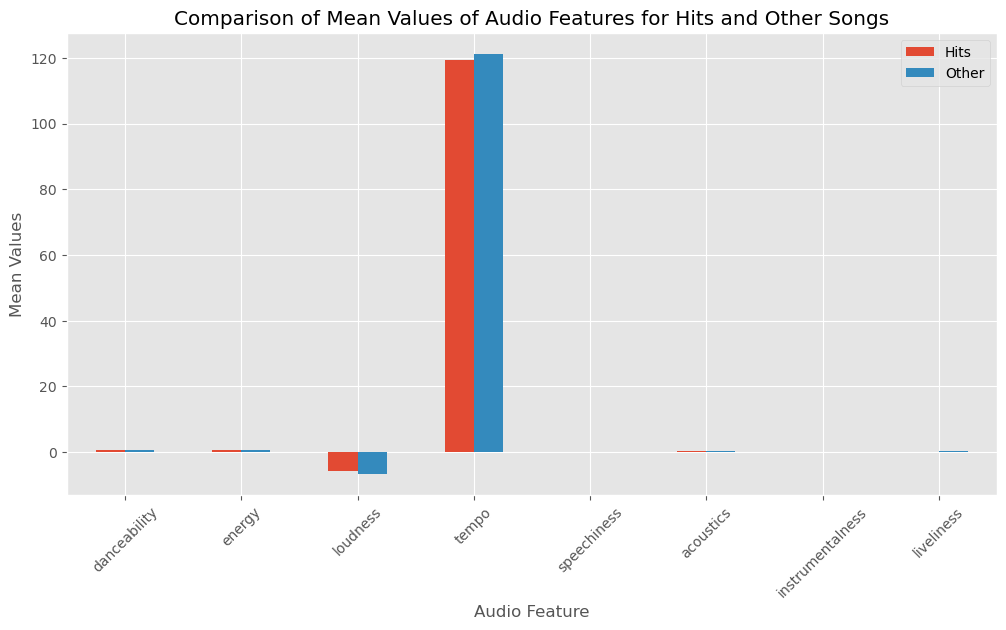

In [21]:
comparison.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Mean Values of Audio Features for Hits and Other Songs')
plt.xlabel('Audio Feature')
plt.ylabel('Mean Values')
plt.xticks(rotation=45)
plt.legend(['Hits', 'Other'])
plt.show()

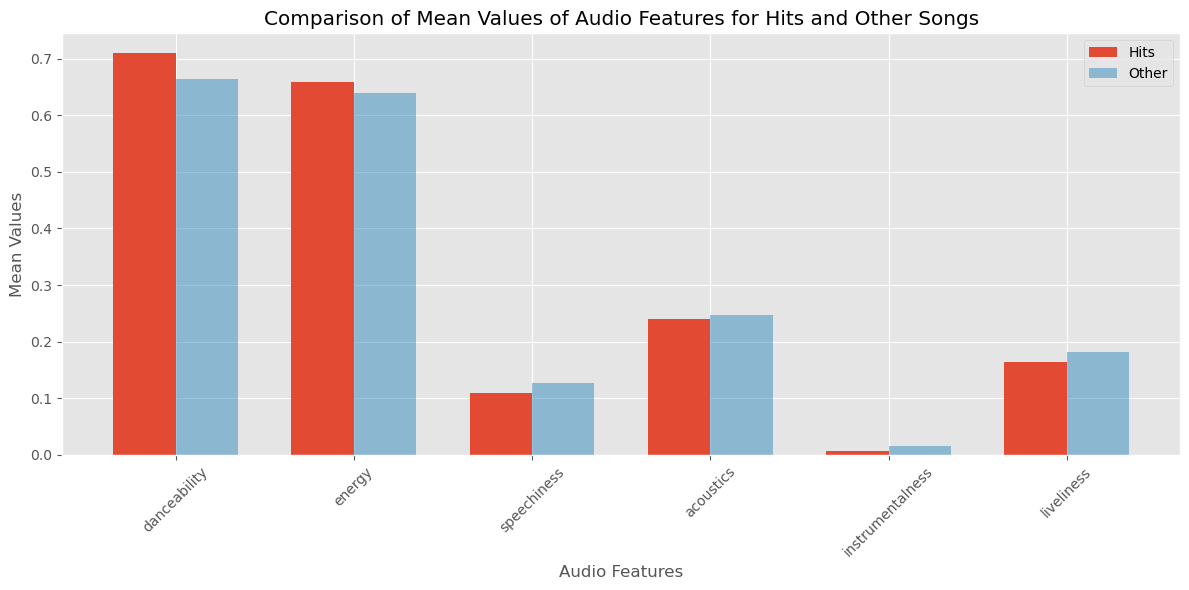

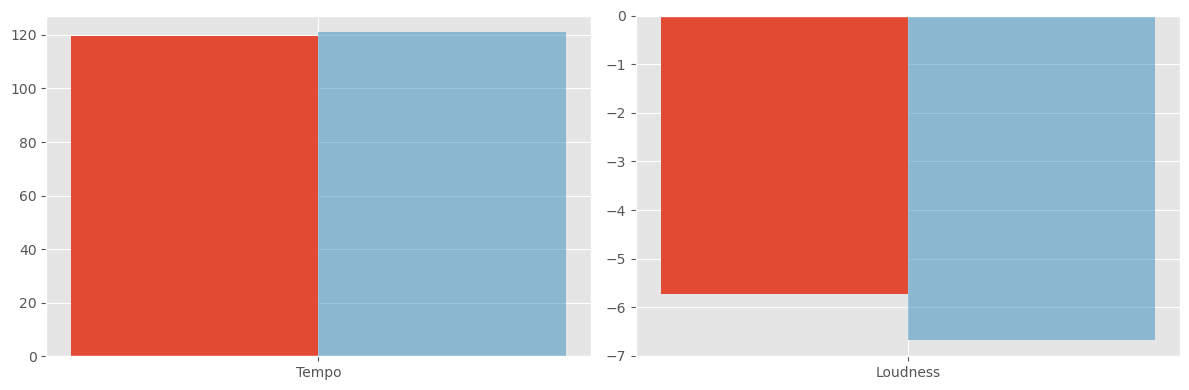

In [ ]:
# We're removing 'tempo' and 'loudness' from the main chart because their value ranges differ significantly from the other features.
features_main = [f for f in comparison.index if f not in ['tempo', 'loudness']]

x = np.arange(len(features_main))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, comparison.loc[features_main, 'Hits'], width, label='Hits')
plt.bar(x + width/2, comparison.loc[features_main, 'Other'], width, label='Other', alpha=0.5)
plt.title('Comparison of Mean Values of Audio Features for Hits and Other Songs')
plt.xlabel('Audio Features')
plt.ylabel('Mean Values')
plt.xticks(x, features_main, rotation=45)
plt.legend(['Hits', 'Other'])
plt.tight_layout()
plt.show()

# separate graphs for 'tempo' and 'loudness'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

x = np.arange(1)

ax1.bar(x - width/2, comparison.loc['tempo', 'Hits'], width, label='Hits')
ax1.bar(x + width/2, comparison.loc['tempo', 'Other'], width, label='Other', alpha=0.5)
ax1.set_xticks(x)
ax1.set_xticklabels(['Tempo'])

ax2.bar(x - width/2, comparison.loc['loudness', 'Hits'], width, label='Hits')
ax2.bar(x + width/2, comparison.loc['loudness', 'Other'], width, label='Other', alpha=0.5)
ax2.set_xticks(x)
ax2.set_xticklabels(['Loudness'])

plt.tight_layout()
plt.show()

In [ ]:
# Danceability and Energy have the highest average values for both hits and other songs, with hits showing slightly higher values. This suggests that danceable and energetic tracks have a greater chance of becoming hits.

# Instrumentalness is very low for both hits and other songs, but even lower for hits. This indicates that vocal tracks are more likely to gain popularity than purely instrumental ones.

# Loudness is noticeably higher (less negative value) for hits compared to other songs, suggesting that louder tracks have a better chance of success.

# The tempo of hits is slightly higher than that of other songs, which may indicate a listener preference for slightly faster tracks.



C:\Users\48668\AppData\Local\Temp\ipykernel_13848\930304965.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


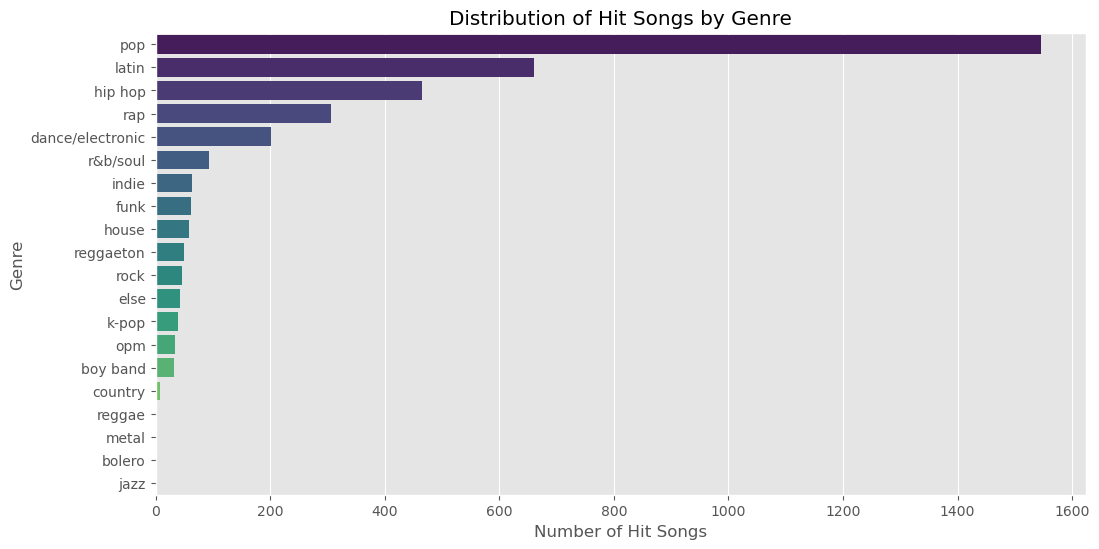

In [ ]:
# I'm examining which genres ('Genre_new') are most frequently represented among the hits.:
genre_counts = df_hits['Genre'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Distribution of Hit Songs by Genre') 
plt.xlabel('Number of Hit Songs')
plt.ylabel('Genre')
plt.show()

In [ ]:
# The pop genre clearly dominates among the hits, with the highest number of tracks (almost 1,600).
# Latin music takes second place on the list, indicating its growing popularity and influence on the global music scene.
# Significant presence of hip-hop and rap: These two genres rank third and fourth respectively, confirming their important role in shaping modern music hits.

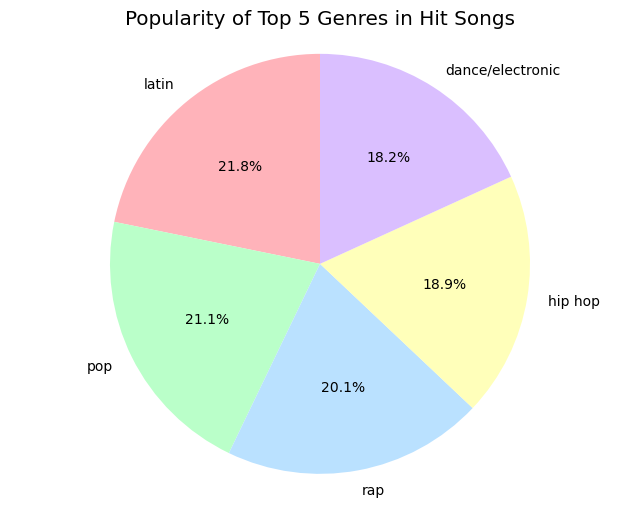

In [ ]:
# I'm checking which of the top 5 music genres ('pop', 'latin', 'hip hop', 'rap', 'dance/electronic') has the highest average popularity:

top_5_genres = df_hits['Genre'].value_counts().nlargest(5).index.tolist()
df_top_5_genres = df_hits[df_hits['Genre'].isin(top_5_genres)].groupby('Genre')['Popularity'].mean().sort_values(ascending=False).to_frame()

genres = df_top_5_genres.index
popularity = df_top_5_genres['Popularity']
pastel_colors = ['#FFB3BA', '#BAFFC9', '#BAE1FF', '#FFFFBA', '#DABFFF']


plt.figure(figsize=(8, 6))
plt.pie(popularity, labels=genres, autopct='%1.1f%%', startangle=90, colors=pastel_colors) # autopct='%1.1f%%' adds percentages & startangle=90 turns the pie chart to start from the top
plt.title('Popularity of Top 5 Genres in Hit Songs')
plt.axis('equal')  # equal aspect ratio ensures the pie chart is circular

plt.show()

In [ ]:
# The chart shows a relatively even distribution of popularity, suggesting diverse listener preferences.
# The latin (21.8%) and pop (21.1%) genres have the largest share among the hits, indicating their leading position in the music market.
# The difference between the most and least popular genre is only 3.6 percentage points, suggesting that all of these genres play an important role in creating hits.

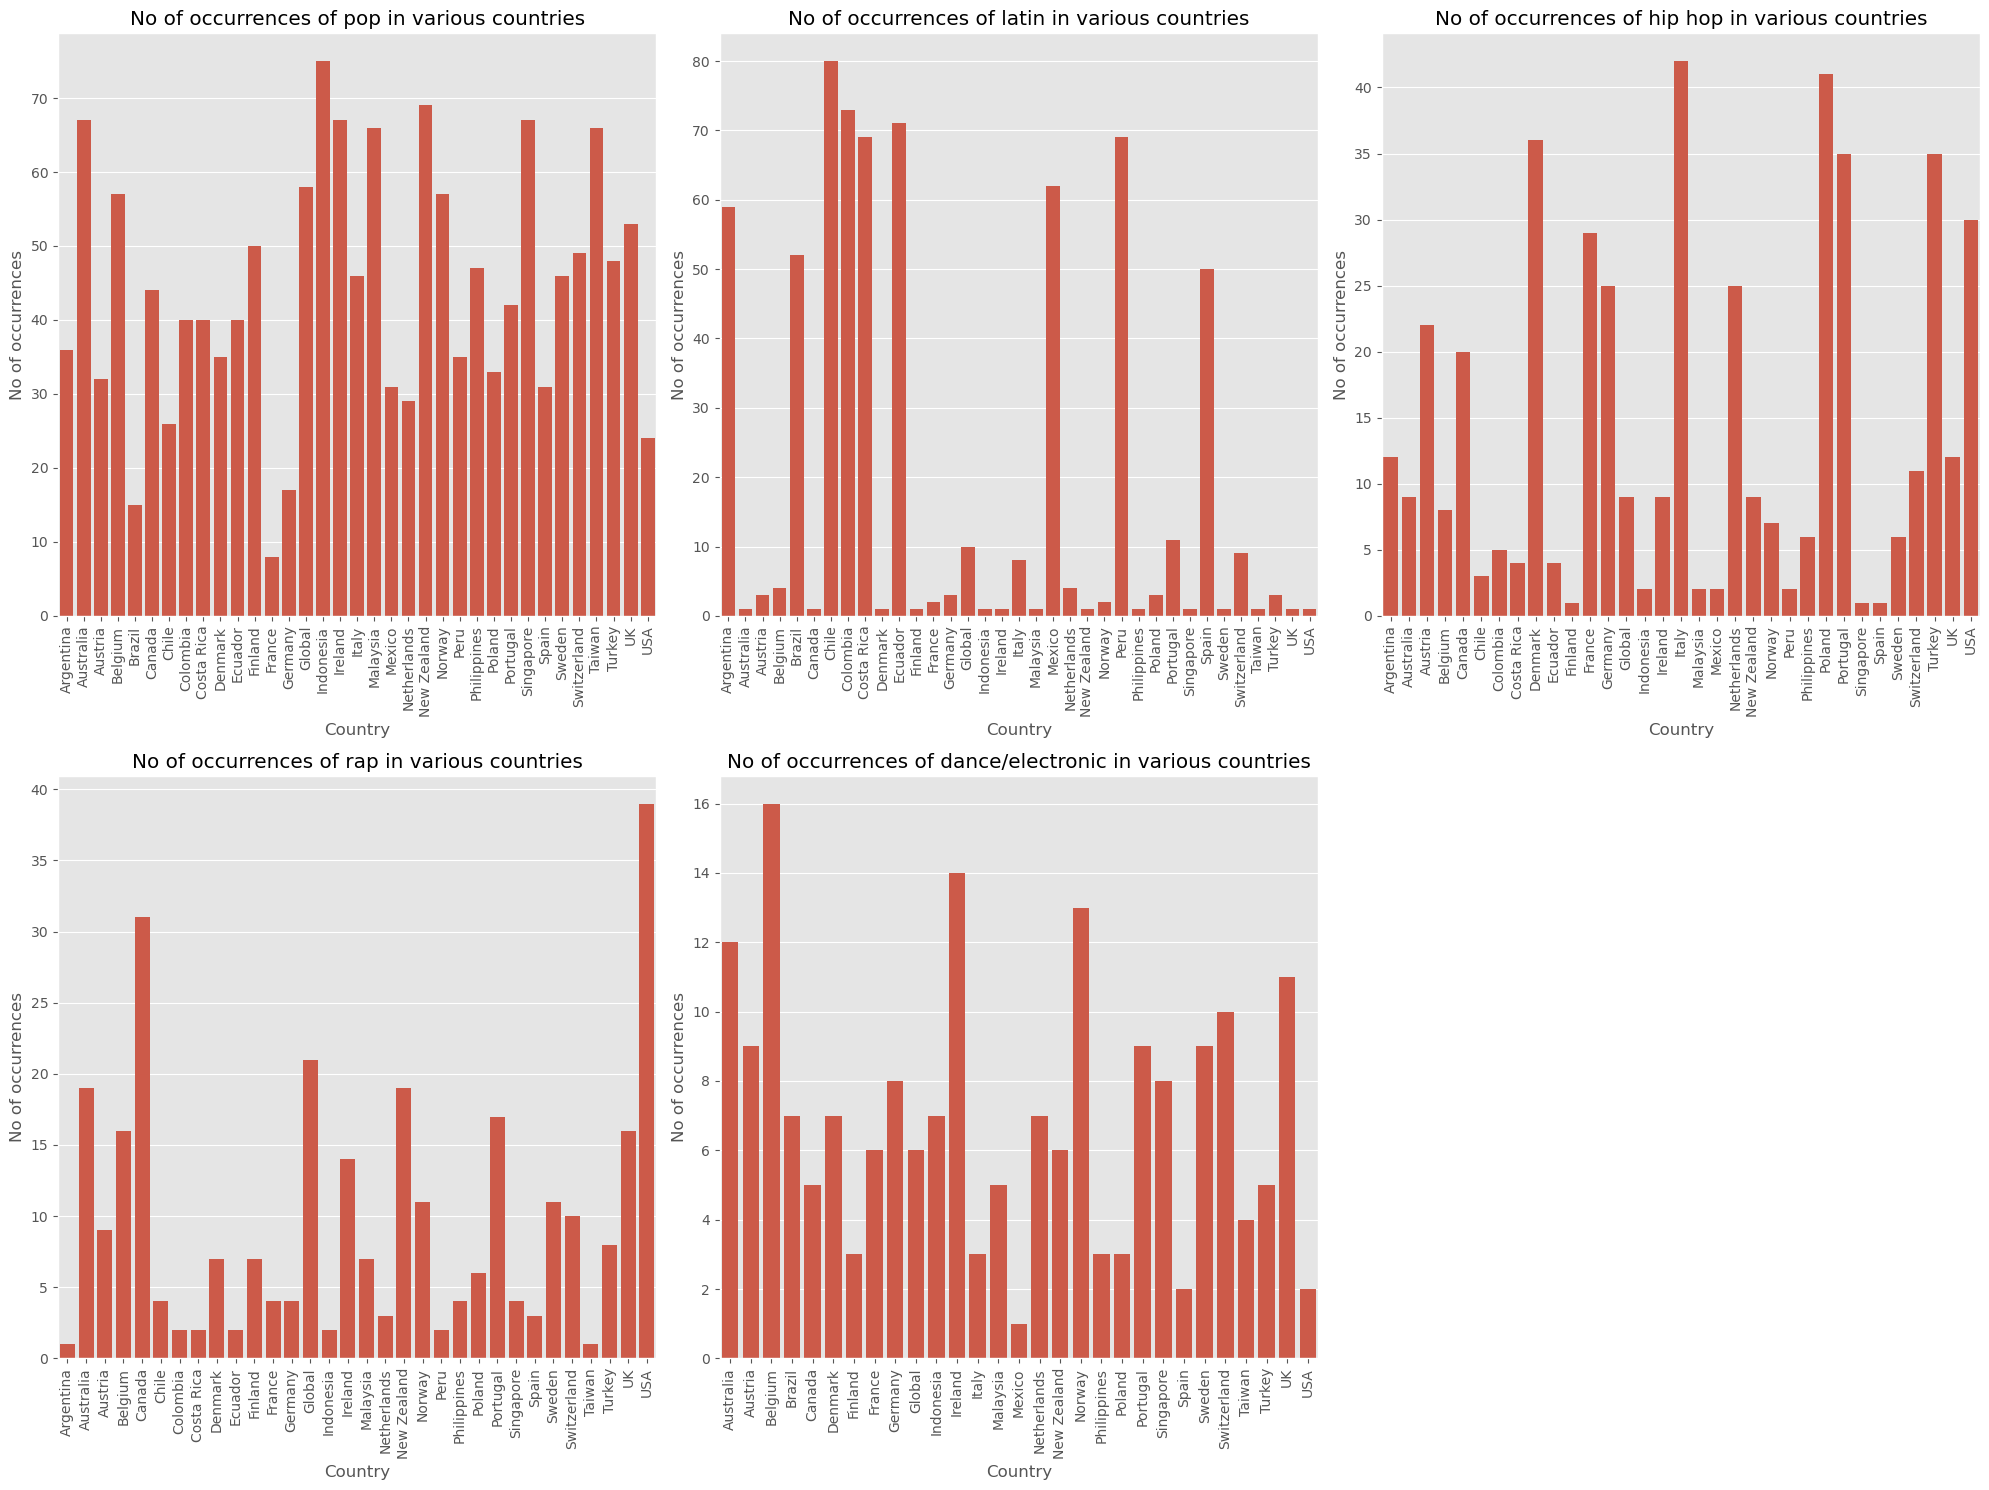

In [ ]:
genre_counts = df_hits[df_hits['Genre'].isin(top_5_genres)].groupby(['Country', 'Genre']).size().reset_index(name='Count')

fig, axes = plt.subplots(2, 3, figsize=(20, 15))  # 3 rows, 2 columns
axes = axes.flatten() # flattening the 2D array of axes to 1D for easier indexing

for i, genre in enumerate(top_5_genres):
    genre_data = genre_counts[genre_counts['Genre'] == genre]
    sns.barplot(data=genre_data, x='Country', y='Count', ax=axes[i])
    axes[i].set_title(f'No of occurrences of {genre} in various countries')
    axes[i].set_xlabel('Country')
    axes[i].set_ylabel('No of occurrences')
    axes[i].tick_params(axis='x', rotation=90)

if len(top_5_genres) < 6:
    fig.delaxes(axes[5]) #get rid of the empty subplot

plt.tight_layout()
plt.show()

In [ ]:
# Pop seems to be the most universal genre, with a high number of occurrences in most countries.
# This suggests that pop songs have the greatest chance of becoming international hits.

# Genres such as latin and hip hop show very high popularity in some countries, but lower in others.
# This indicates that hits in these genres may be more dependent on the target market and may need to be adjusted to local preferences.

# Genres like rap and dance/electronic, although generally having fewer occurrences, are present in many countries.
# This suggests that hits in these genres may have a smaller but more dedicated fanbase worldwide.

# The charts show that different countries have different genre preferences. This means that the "anatomy of a hit" can vary significantly depending on the target market.
# The USA appears to have a high number of occurrences across all genres, suggesting that musical trends from this country may have a significant influence on the global "anatomy of a hit."

In [55]:
european_countries = [
    "Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina",
    "Bulgaria", "Croatia", "Czech Republic", "Denmark", "Estonia", "Finland",
    "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy",
    "Kosovo", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta",
    "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia", "Norway",
    "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovakia",
    "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", "United Kingdom",
    "Vatican City"]

features = ['danceability', 'energy','speechiness', 'acoustics', 'instrumentalness', 'liveliness']

df_hits_usa = df_hits[df_hits['Country']=="USA"]

df_hits_eu = df_hits[df_hits['Country'].isin(european_countries)]

df_hits_other_countries = df_hits[
    (df_hits['Country'] == "USA") | 
    (df_hits['Country'] == "Global") | 
    (~df_hits['Country'].isin(european_countries))]

df_hits_global = df_hits[df_hits['Country']=="Global"]

hits_usa_means = df_hits_usa[features].apply(pd.to_numeric, errors='coerce').mean()
hits_eu_means = df_hits_eu[features].apply(pd.to_numeric, errors='coerce').mean() 
other_countries_means = df_hits_other_countries[features].apply(pd.to_numeric, errors='coerce').mean()  
hits_global_means = df_hits_global[features].apply(pd.to_numeric, errors='coerce').mean()


comparison_countries = pd.DataFrame({
    'Hits USA': hits_usa_means,
    'Hits EU': hits_eu_means,
    'Hits Other Countries' : other_countries_means,
    'Hits Global' : hits_global_means
})

print(comparison_countries)

                  Hits USA   Hits EU  Hits Other Countries  Hits Global
danceability      0.751562  0.703490              0.712475     0.710604
energy            0.573876  0.663862              0.654626     0.621216
speechiness       0.150205  0.112687              0.108419     0.102699
acoustics         0.213462  0.228185              0.248571     0.229662
instrumentalness  0.012219  0.008744              0.006674     0.012523
liveliness        0.176712  0.158449              0.167293     0.161308


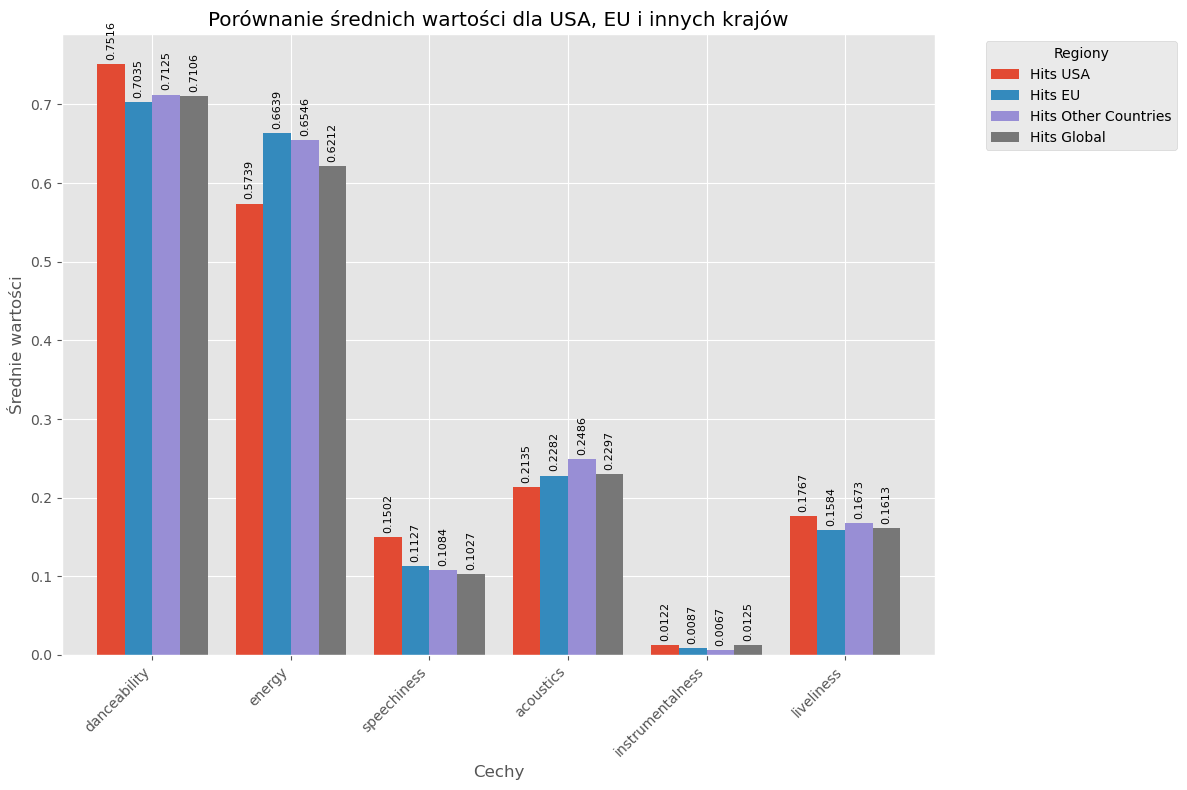

In [ ]:
ax = comparison_countries.plot(kind='bar', figsize=(12, 8), width=0.8)
plt.title('Porównanie średnich wartości dla USA, EU i innych krajów')
plt.xlabel('Cechy')
plt.ylabel('Średnie wartości')
plt.legend(title='Regiony', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

# adding bar labels:
for container in ax.containers:
    ax.bar_label(container, padding=3, rotation=90, fontsize=8, fmt='%.4f')

plt.tight_layout()
plt.show()

In [62]:
tempo_hits_usa_means = df_hits_usa["tempo"].apply(pd.to_numeric, errors='coerce').mean()
tempo_hits_eu_means = df_hits_eu["tempo"].apply(pd.to_numeric, errors='coerce').mean() 
tempo_other_countries_means = df_hits_other_countries["tempo"].apply(pd.to_numeric, errors='coerce').mean()  
tempo_hits_global_means = df_hits_global["tempo"].apply(pd.to_numeric, errors='coerce').mean()

loudness_hits_usa_means = df_hits_usa["loudness"].apply(pd.to_numeric, errors='coerce').mean()
loudness_hits_eu_means = df_hits_eu["loudness"].apply(pd.to_numeric, errors='coerce').mean() 
loudness_other_countries_means = df_hits_other_countries["loudness"].apply(pd.to_numeric, errors='coerce').mean()  
loudness_hits_global_means = df_hits_global["loudness"].apply(pd.to_numeric, errors='coerce').mean()

comparison_countries_tempo = pd.DataFrame({
    'Hits USA': tempo_hits_usa_means,
    'Hits EU': tempo_hits_eu_means,
    'Hits Other Countries': tempo_other_countries_means,
    'Hits Global' : tempo_hits_global_means
}, index=['Tempo'])

comparison_countries_loudness = pd.DataFrame({
    'Hits USA': loudness_hits_usa_means,
    'Hits EU': loudness_hits_eu_means,
    'Hits Other Countries' : loudness_other_countries_means,
    'Hits Global' : loudness_hits_global_means
}, index=['loudness'])

print(comparison_countries_tempo)
print(comparison_countries_loudness)

         Hits USA     Hits EU  Hits Other Countries  Hits Global
Tempo  122.708714  117.804985             120.47046   116.442153
          Hits USA   Hits EU  Hits Other Countries  Hits Global
loudness -6.756686 -5.937502             -5.585176    -5.915694


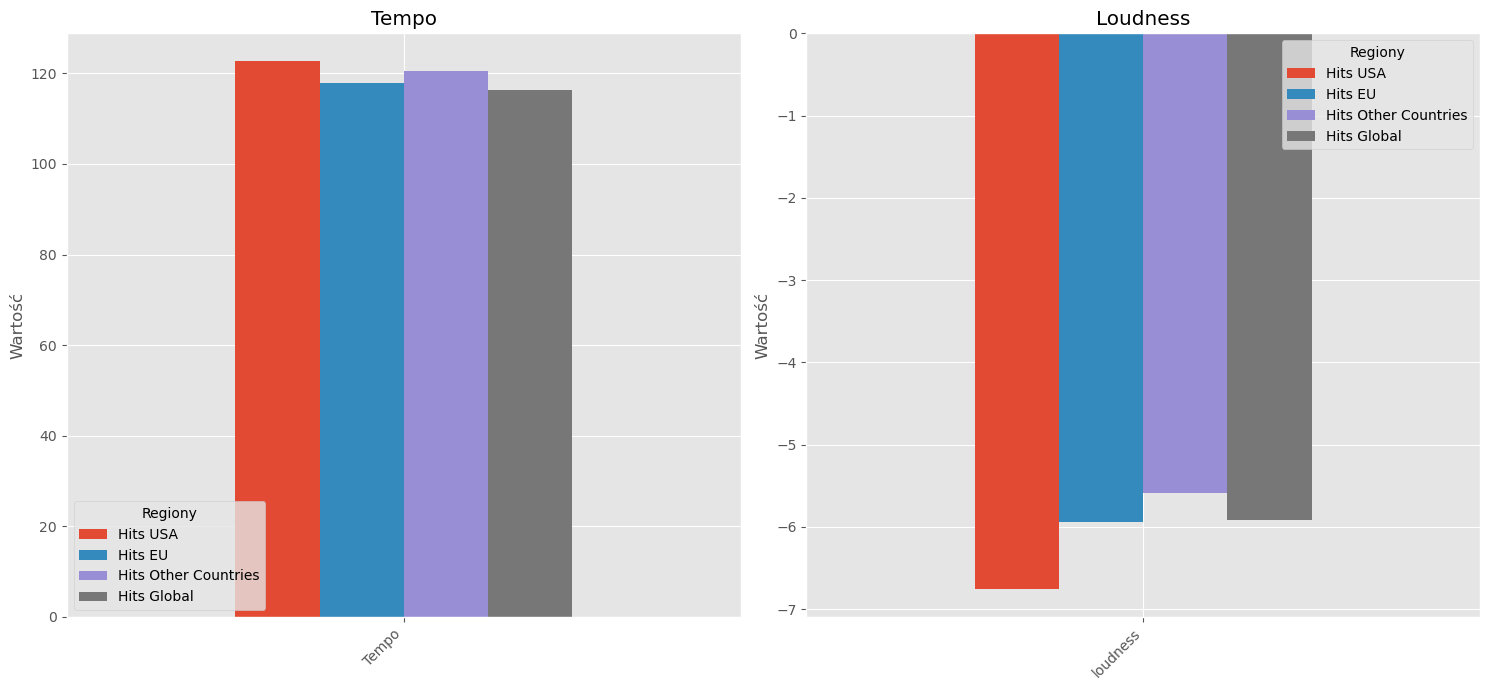

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Graph for tempo
comparison_countries_tempo.plot(kind='bar', ax=ax1)
ax1.set_title('Tempo')
ax1.set_ylabel('Wartość')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.legend(title='Regiony', loc='lower left')

# Graph for loudness
comparison_countries_loudness.plot(kind='bar', ax=ax2)
ax2.set_title('Loudness')
ax2.set_ylabel('Wartość')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.legend(title='Regiony')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

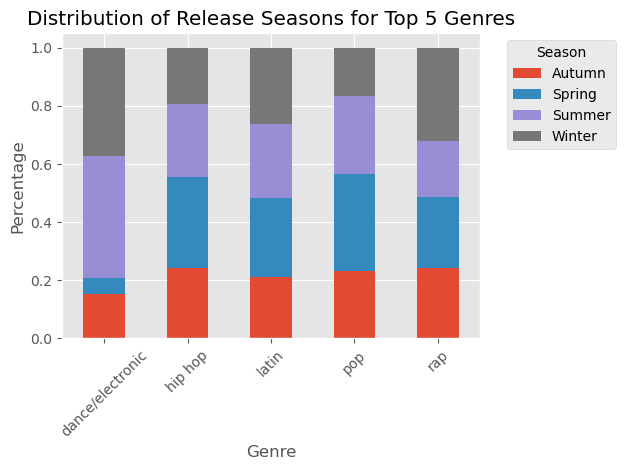

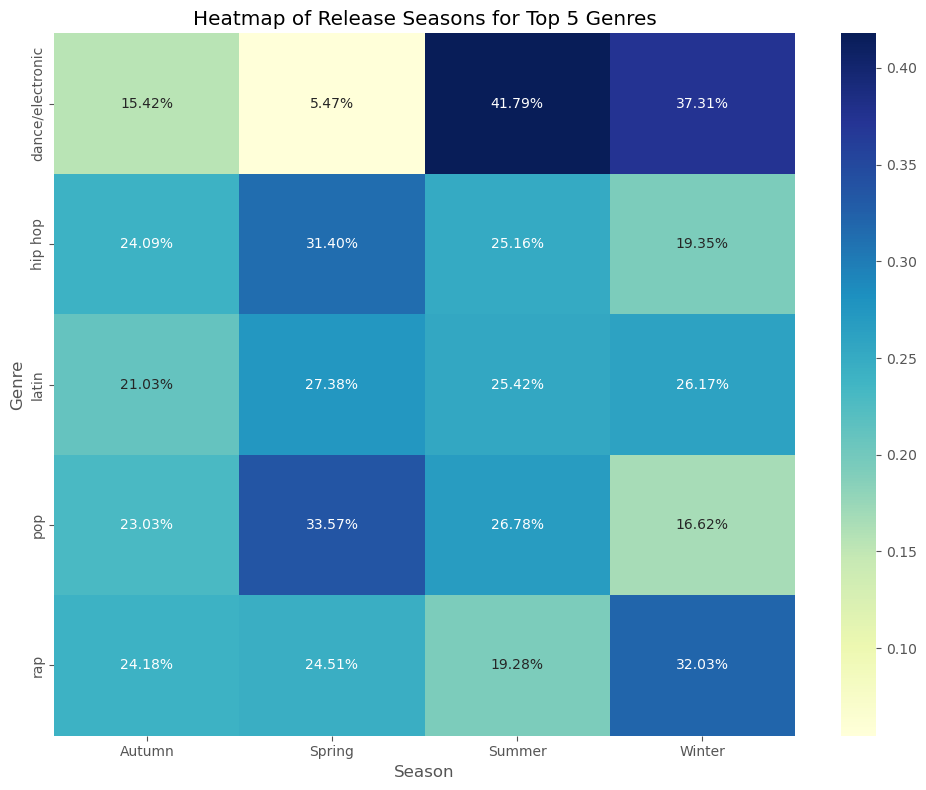

In [ ]:
# Check in which seasons the top 5 music genres are most frequently released:

df_top_5 = df_hits[df_hits['Genre'].isin(top_5_genres)]

# creating a crosstab to show the distribution of release seasons for the top 5 genres
season_genre_cross = pd.crosstab(df_top_5['Genre'], df_top_5['release_season'], normalize='index')


plt.figure(figsize=(12, 8))
season_genre_cross.plot(kind='bar', stacked=True)
plt.title('Distribution of Release Seasons for Top 5 Genres')
plt.xlabel('Genre')
plt.ylabel('Percentage')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(season_genre_cross, annot=True, cmap='YlGnBu', fmt='.2%')
plt.title('Heatmap of Release Seasons for Top 5 Genres')
plt.xlabel('Season') 
plt.tight_layout()
plt.show()


In [ ]:
# Each music genre shows clear seasonal preferences in releasing tracks. For example, dance/electronic music is by far the most 
# popular in summer (41.79%) and winter (37.31%), while rap has the highest percentage of releases in winter (32.03%).

# Pop and latin genres have the highest percentage of releases in spring (33.57% and 27.38%, respectively), 
# suggesting that spring is the preferred season for these music styles.

# Dance/electronic shows the most extreme seasonal preferences, with a very low percentage of releases in spring (5.47%) and 
# autumn (15.42%), and very high percentages in summer and winter. This suggests a strong seasonal dependence in the promotion and release of electronic music.

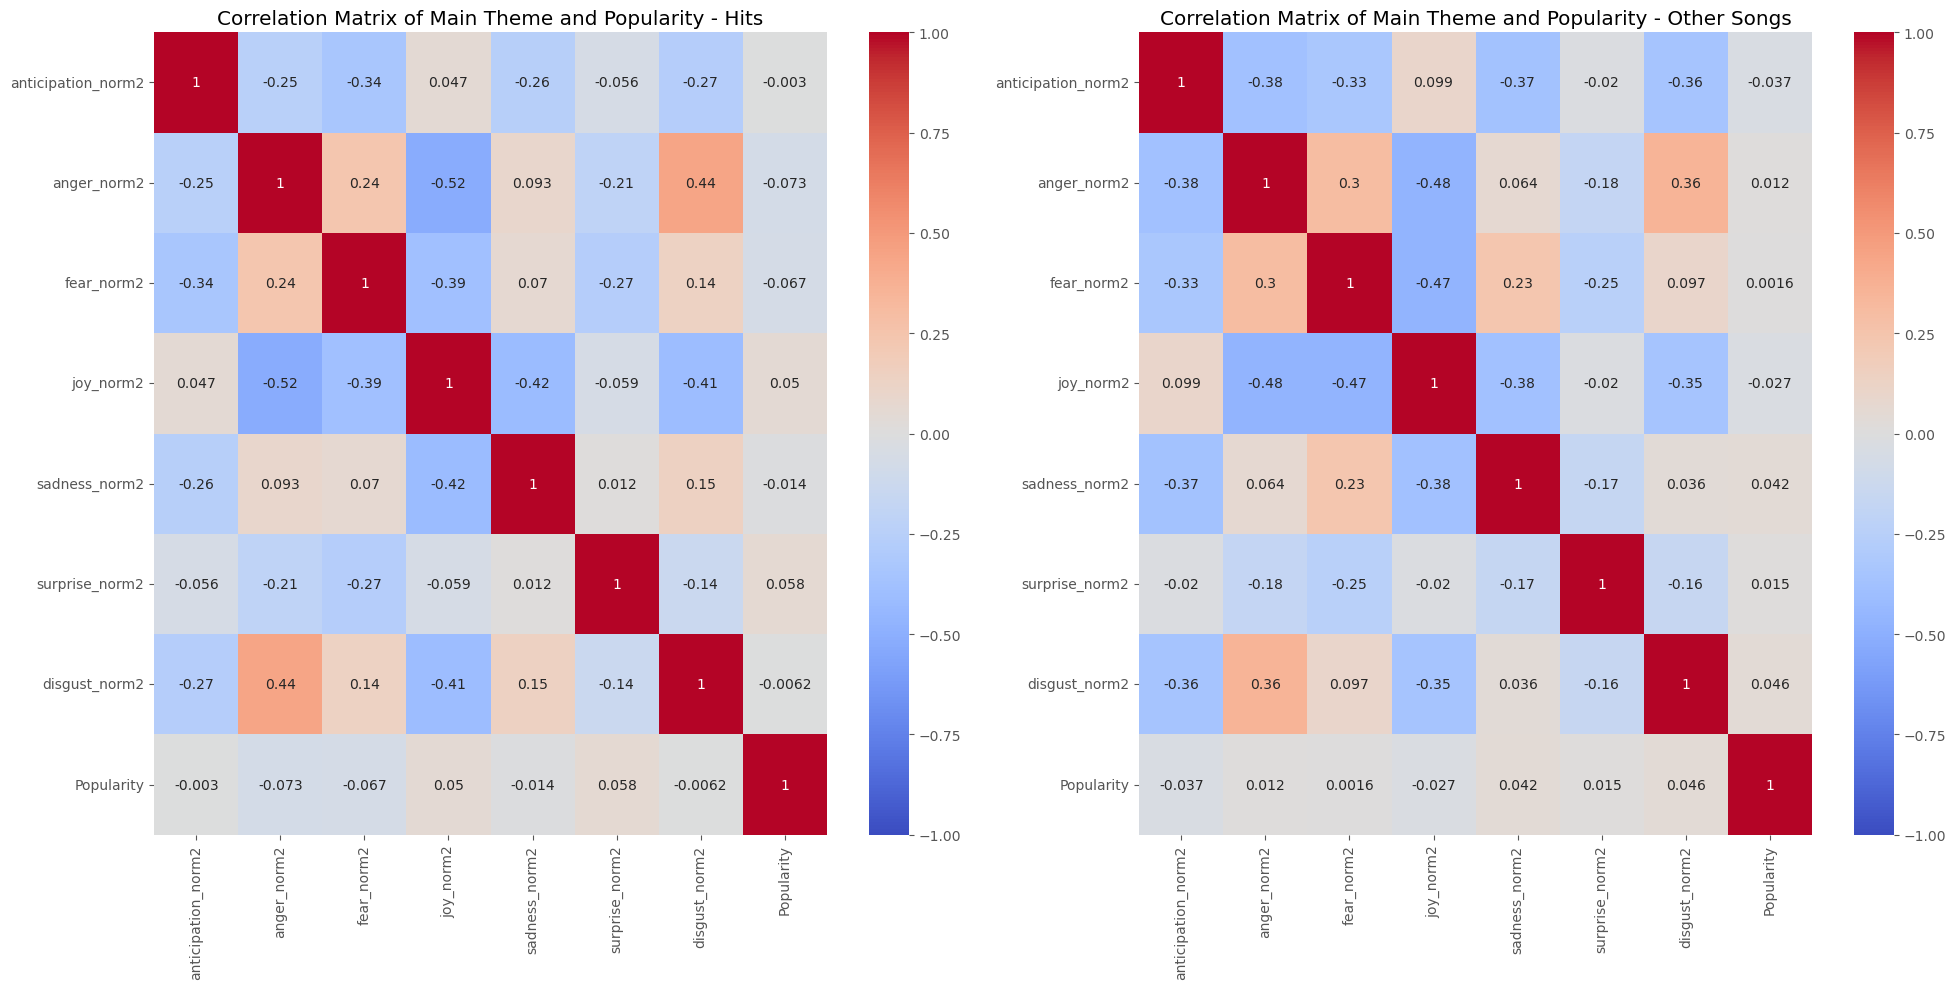

In [ ]:
# Investigating the correlation between the main themes of songs and their popularity:

key_themes_columns = ['anticipation_norm2','anger_norm2', 'fear_norm2', 'joy_norm2', 'sadness_norm2', 'surprise_norm2', 'disgust_norm2']

correlation_matrix_hits = df_hits[key_themes_columns + ['Popularity']].corr()
correlation_matrix = df_non_hits[key_themes_columns + ['Popularity']].corr()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
sns.heatmap(correlation_matrix_hits, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, ax=ax1)
ax1.set_title('Correlation Matrix of Main Theme and Popularity - Hits')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, ax=ax2)
ax2.set_title('Correlation Matrix of Main Theme and Popularity - Other Songs')
plt.tight_layout()
plt.show()

In [ ]:
# None of the analyzed themes (anticipation, anger, fear, joy, sadness, surprise, disgust) show a strong correlation with the popularity of the song.
# The correlation values with popularity are very close to zero (from -0.027 to 0.022), suggesting that the presence of these emotions in the song's 
# lyrics has little to no effect on its popularity.

# Both for hits and all songs, the correlations between the main themes and popularity are very weak. The correlation values are close to zero, 
# suggesting that the emotional content of the lyrics has little direct impact on a song's popularity.

# The "surprise" theme shows the weakest correlations with other themes and popularity, which may suggest that it is the most neutral 
# or independent element among the analyzed text features.

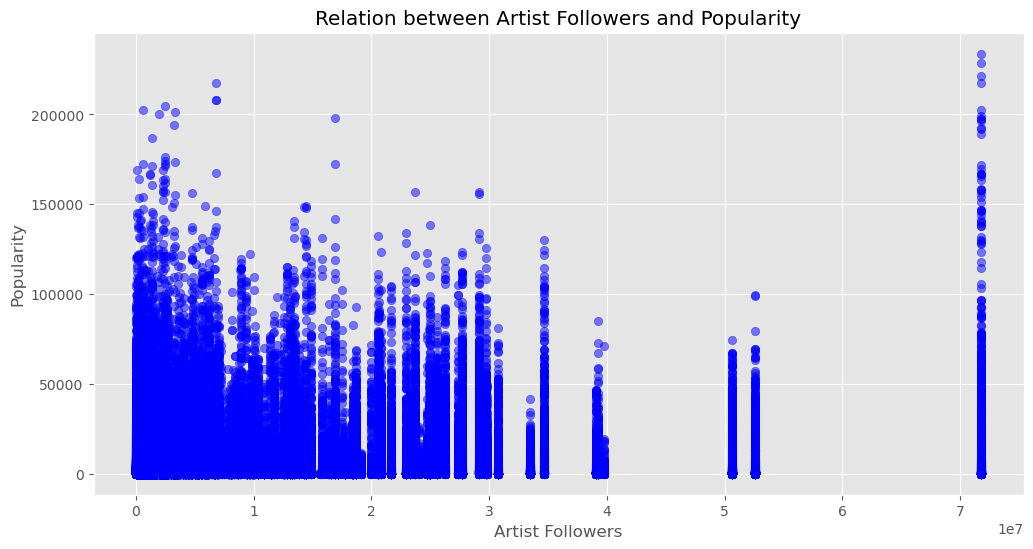

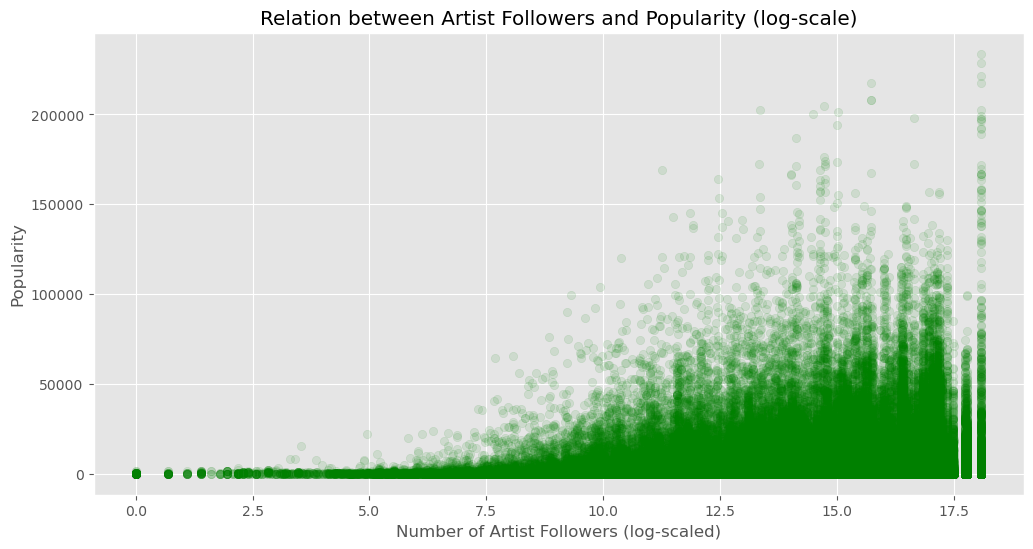

In [34]:
df_raw['Artist_followers'] = pd.to_numeric(df_raw['Artist_followers'], errors='coerce') # errors='coerce' - invalid parsing will be set as NaN

plt.figure(figsize=(12, 6))
plt.scatter(df_raw['Artist_followers'], df_raw['Popularity'], alpha=0.5, color = 'blue')
plt.title('Relation between Artist Followers and Popularity')
plt.xlabel('Artist Followers')
plt.ylabel('Popularity')
plt.show()


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df_raw[['Artist_followers', 'Popularity']].copy()
df_scaled[['Artist_followers_scaled', 'Popularity_scaled']] = scaler.fit_transform(df_scaled)

plt.figure(figsize=(12, 6))
plt.scatter(np.log1p(df_raw['Artist_followers']), df_raw['Popularity'], alpha=0.1, color = 'green')
plt.title('Relation between Artist Followers and Popularity (log-scale)')
plt.xlabel('Number of Artist Followers (log-scaled)')
plt.ylabel('Popularity')
plt.show()


In [ ]:
# Despite the overall upward trend, both charts show significant data dispersion, suggesting that the number of 
# followers is not the only factor influencing the popularity of tracks.

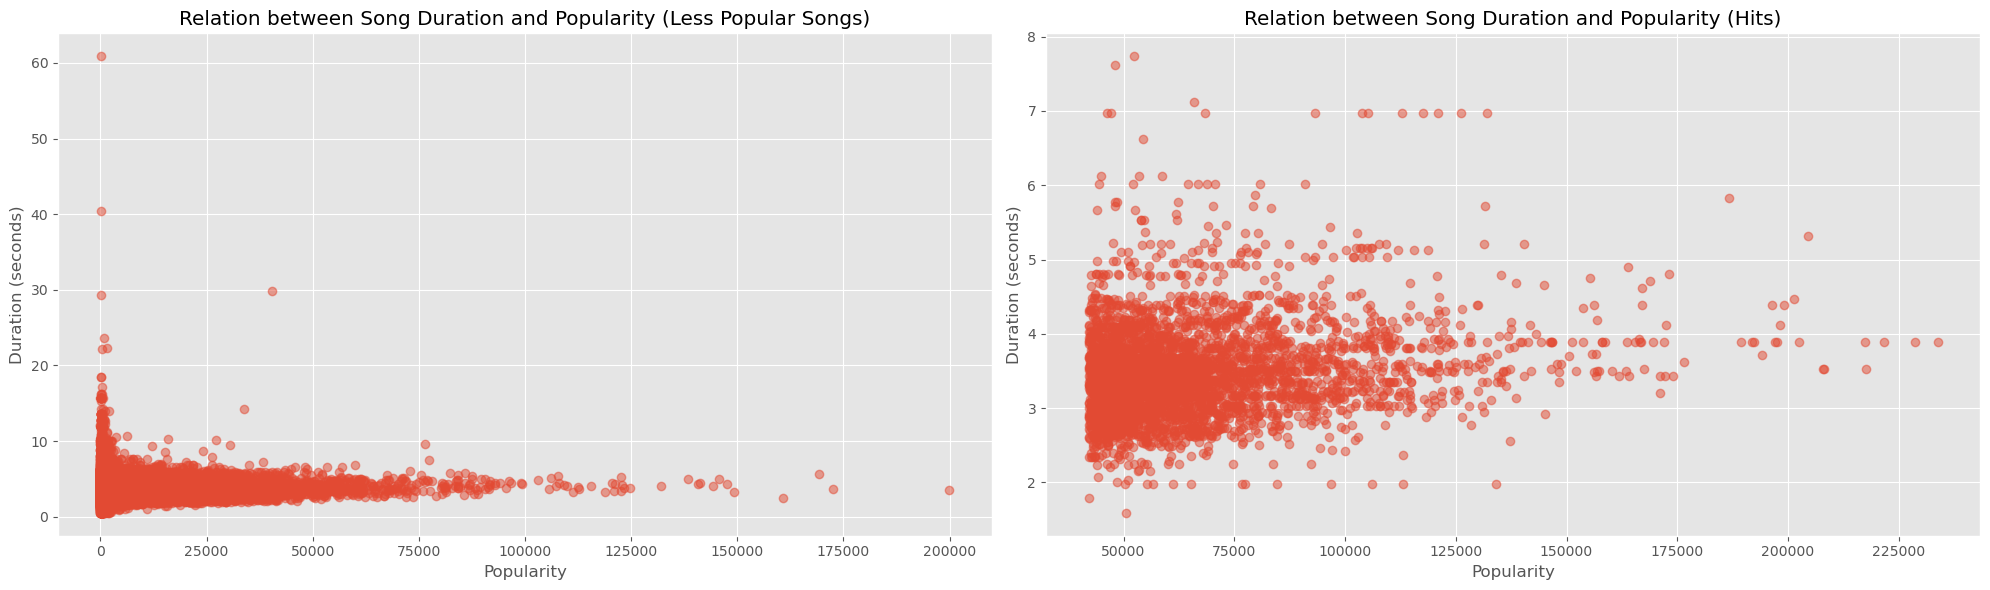

In [ ]:
x = df_non_hits['Popularity']
y = pd.to_numeric(df_non_hits['duration_ms'], errors='coerce') / 60000 # converting milliseconds to minutes

x_hits = df_hits['Popularity']
y_hits = pd.to_numeric(df_hits['duration_ms'], errors='coerce') / 60000

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.plot(x, y, 'o', alpha=0.5)
ax1.set_title("Relation between Song Duration and Popularity (Less Popular Songs)")
ax1.set_xlabel('Popularity')
ax1.set_ylabel('Duration (seconds)')

ax2.plot(x_hits, y_hits, 'o', alpha=0.5)
ax2.set_title('Relation between Song Duration and Popularity (Hits)')
ax2.set_xlabel('Popularity')
ax2.set_ylabel('Duration (seconds)')

plt.tight_layout()
plt.show()

In [ ]:
# Song length matters more for hits - most tracks are between 150–250 seconds (2.5–4 minutes) in length.

# Variety among less popular songs: For lesser-known tracks, length is not a key factor in popularity.
# There is greater variation in song length, suggesting that other factors may have a larger impact on their reception.

In [38]:
top_artists = df_hits['Artist'].value_counts().head(20).reset_index()
top_artists.columns = ['Artist', 'count']
print(top_artists)

                                       Artist  count
0                                  Ed Sheeran     92
1                                 Post Malone     55
2                                    Dua Lipa     49
3                               Billie Eilish     46
4                                XXXTENTACION     40
5                                 Tones And I     37
6                               Lewis Capaldi     36
7                                       Drake     35
8               Shawn Mendes - Camila Cabello     33
9                                  The Weeknd     30
10                                     Maluma     30
11                Camila Cabello - Young Thug     29
12                              Ariana Grande     28
13  Luis Fonsi - Daddy Yankee - Justin Bieber     27
14                    Post Malone - 21 Savage     25
15                The Chainsmokers - Coldplay     25
16                                   J Balvin     24
17                            Imagine Dragons 

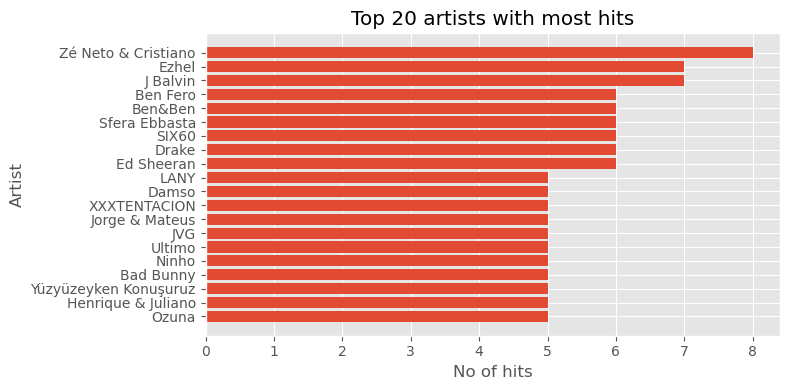

In [ ]:
df_top_artists = df_hits.groupby('Artist')['Title'].nunique().reset_index()
df_top_artists.columns = ['Artist', 'Number_of_Hits']
df_top_artists = df_top_artists.sort_values('Number_of_Hits', ascending=False)

top_20 = df_top_artists.head(20)

plt.figure(figsize=(8, 4))
plt.barh(top_20['Artist'], top_20['Number_of_Hits'])
plt.xlabel('No of hits')
plt.ylabel('Artist')
plt.title('Top 20 artists with most hits')
plt.gca().invert_yaxis()  # invert y-axis to have the artist with the most hits on top
plt.tight_layout()
plt.show()

In [40]:
percentage_of_singles = (df_hits['Album/Single'].str.contains("single").sum() / len(df_hits)) * 100
percentage_of_albums = (df_hits['Album/Single'].str.contains("album").sum() / len(df_hits)) * 100
print(f"{percentage_of_singles:.2f}% of 'hits' are singles.")
print(f"{percentage_of_albums:.2f}% of 'hits' are part of album.")

53.33% of 'hits' are singles.
46.05% of 'hits' are part of album.


In [41]:
df_top_artists = df_hits.groupby('Artist').agg({
    'Title': 'nunique',
    'Artist': 'count',
    'Artist_followers': 'first'
}).rename(columns={
    'Title': 'Unique_Hits',
    'Artist': 'Total_Appearances'
})

df_top_artists = df_top_artists.sort_values(['Unique_Hits', 'Total_Appearances', 'Artist_followers'], ascending=False).reset_index()

df_top_artists.head(10)

,Artist,Unique_Hits,Total_Appearances,Artist_followers
0,Zé Neto & Cristiano,8,8,12263746.0
1,J Balvin,7,24,23718139.0
2,Ezhel,7,7,3248128.0
3,Ed Sheeran,6,92,71783101.0
4,Drake,6,35,50593376.0
5,Sfera Ebbasta,6,6,4040606.0
6,Ben&Ben,6,6,2506967.0
7,Ben Fero,6,6,2027815.0
8,SIX60,6,6,379988.0
9,XXXTENTACION,5,40,22910410.0


In [42]:
df_top_artists['Artist_followers'] = df_top_artists['Artist_followers'].astype(float)
df_top_artists = df_top_artists.sort_values(['Artist_followers', 'Total_Appearances', 'Unique_Hits'], ascending=[False, False, False]).reset_index()
df_top_artists.head(10)

,index,Artist,Unique_Hits,Total_Appearances,Artist_followers
0,3,Ed Sheeran,6,92,71783101.0
1,149,Ed Sheeran - Khalid,1,19,71783101.0
2,155,Ed Sheeran - Justin Bieber,1,17,71783101.0
3,325,Ed Sheeran - Camila Cabello - Cardi B,1,3,71783101.0
4,456,Ed Sheeran - Beyoncé,1,1,71783101.0
5,68,Ariana Grande,2,28,52571724.0
6,295,Ariana Grande - Justin Bieber,1,4,52571724.0
7,4,Drake,6,35,50593376.0
8,251,Drake - WizKid - Kyla,1,6,50593376.0
9,356,Drake - Rick Ross,1,2,50593376.0


In [ ]:
# mainly most popular artists / feats of most popular artists

In [44]:
percentage_of_feats = (df_hits['Artist'].str.contains(" - ").sum() / len(df_hits)) * 100
print(f"{percentage_of_feats:.2f}% of 'hits' have several authors.")

53.35% of 'hits' have several authors.


In [45]:
percentage_of_feats_all_songs = (df_raw['Artist'].str.contains(" - ").sum() / len(df_raw)) * 100
print(f"{percentage_of_feats_all_songs:.2f}% of all songs in database have several authors.")

38.35% of all songs in database have several authors.


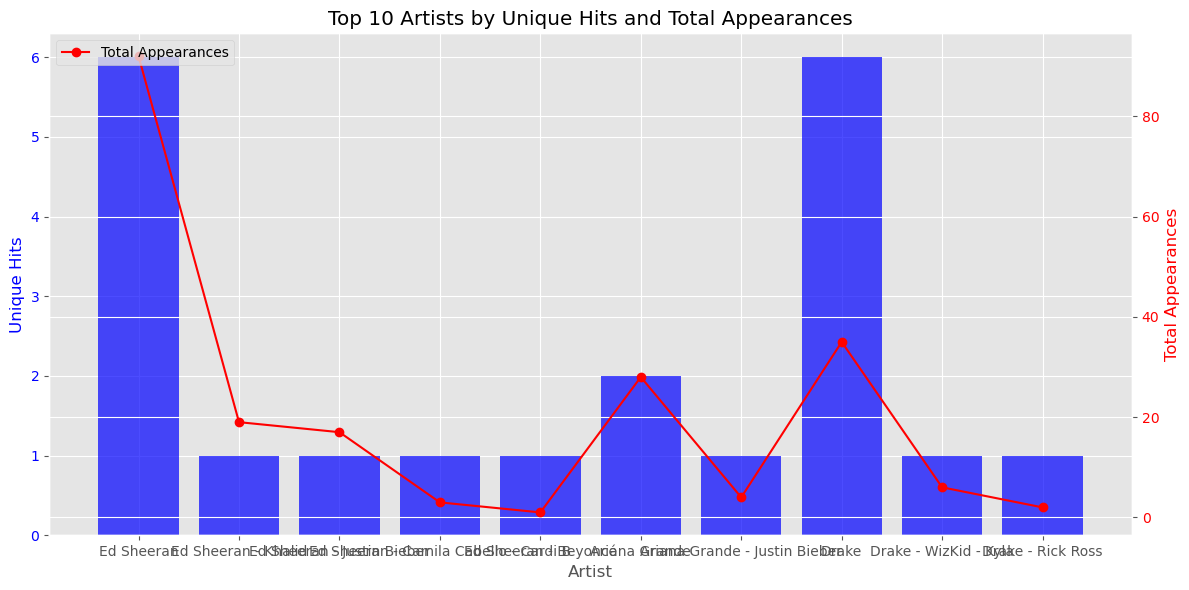

In [ ]:
top_10 = df_top_artists.head(10)

fig, ax1 = plt.subplots(figsize=(12, 6))


ax1.bar(top_10['Artist'], top_10['Unique_Hits'], color='b', alpha=0.7, label='Unique Hits')
ax1.set_xlabel('Artist')
ax1.set_ylabel('Unique Hits', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(top_10['Artist'], top_10['Total_Appearances'], color='r', marker='o', label='Total Appearances')
ax2.set_ylabel('Total Appearances', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Top 10 Artists by Unique Hits and Total Appearances')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Ed Sheeran stands out both for the number of unique hits (6) and the huge number of occurrences (92) in the database,
# indicating his great popularity – it’s worth taking a closer look at his tracks.

# XXXTENTACION, despite having the fewest unique hits (5), has a relatively high number of occurrences (40),
# which may indicate that several specific tracks of his are very popular – it’s worth investigating which of them are the most popular.

In [ ]:
# checking the most popular songs of Ed Sheeran and XXXTENTACION:

Ed_Sheeran = df_hits[df_hits['Artist'] == 'Ed Sheeran']
XXXTENTACION = df_hits[df_hits['Artist'] == 'XXXTENTACION']


print(Ed_Sheeran['Title'].value_counts().head(10))
print('\n')
print(XXXTENTACION['Title'].value_counts().head(10))

Title
shape of you          35
perfect               23
galway girl           15
castle on the hill    12
happier                6
photograph             1
Name: count, dtype: int64


Title
sad!                                  17
jocelyn flores                        12
moonlight                              9
everybody dies in their nightmares     1
changes                                1
Name: count, dtype: int64


In [ ]:
selected_columns = ['Title',  'Genre','Album/Single', 'Album', 'release_season','Popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'tempo', 'speechiness', 'acoustics', 'instrumentalness', 'liveliness']

Ed_Sheeran = Ed_Sheeran[selected_columns].reset_index()
XXXTENTACION = XXXTENTACION[selected_columns].reset_index()

Ed_Sheeran = Ed_Sheeran.groupby(['Title', 'Album/Single','Album' ,'release_season', 'Genre',]).mean().sort_values(by='Popularity', ascending=False).reset_index()
XXXTENTACION = XXXTENTACION.groupby(['Title', 'Album/Single','Album' ,'release_season', 'Genre',]).mean().sort_values(by='Popularity', ascending=False).reset_index()

Ed_Sheeran.head()

,Title,Album/Single,Album,release_season,Genre,index,Popularity,duration_ms,danceability,energy,loudness,tempo,speechiness,acoustics,instrumentalness,liveliness
0,shape of you,album,÷ (Deluxe),Spring,pop,52652.000000,163798.067143,233713.0,0.825,0.652,-3.183,95.977,0.0802,0.581,0.0,0.0931
1,perfect,album,÷ (Deluxe),Spring,pop,14231.043478,100533.291304,263400.0,0.599,0.448,-6.312,95.05,0.0232,0.163,0.0,0.106
2,photograph,album,x (Wembley Edition),Winter,pop,27022.000000,78044.000000,258987.0,0.614,0.379,-10.48,107.989,0.0476,0.607,0.000464,0.0986
3,castle on the hill,album,÷ (Deluxe),Spring,pop,28135.833333,61649.283333,261154.0,0.461,0.834,-4.868,135.007,0.0989,0.0232,0.000011,0.14
4,happier,album,÷ (Deluxe),Spring,pop,50746.333333,58107.308333,207520.0,0.522,0.385,-7.355,89.792,0.0288,0.536,0.0,0.135


In [ ]:
XXXTENTACION.head()

,Title,Album/Single,Album,release_season,Genre,index,Popularity,duration_ms,danceability,energy,loudness,tempo,speechiness,acoustics,instrumentalness,liveliness
0,jocelyn flores,album,17,Summer,rap,25478.000000,81468.891667,119133.0,0.872,0.391,-9.144,134.021,0.242,0.469,0.000004,0.297
1,sad!,album,?,Spring,rap,39591.411765,76069.935294,166606.0,0.74,0.613,-4.88,75.023,0.145,0.258,0.00372,0.123
2,moonlight,album,?,Spring,rap,42356.444444,64835.061111,135090.0,0.921,0.537,-5.723,128.009,0.0804,0.556,0.00404,0.102
3,changes,album,?,Spring,rap,42066.000000,50882.150000,121887.0,0.669,0.308,-10.068,64.934,0.029,0.883,0.0,0.0984
4,everybody dies in their nightmares,album,17,Summer,rap,7915.000000,50539.900000,95467.0,0.734,0.57,-7.066,129.953,0.133,0.847,0.000021,0.112


In [ ]:
# Difference in popularity between Ed Sheeran and XXXTENTACION for the top 3 songs:
top_3_songs_popularity_comparison = pd.DataFrame({
    'Ed Sheeran Popularity': Ed_Sheeran['Popularity'][:3].round(0).astype(int).values,
    'XXXTENTACION Popularity': XXXTENTACION['Popularity'][:3].round(0).astype(int).values,
    'Difference (Ed Sheeran - XXXTENTACION)' : (Ed_Sheeran['Popularity'][:3] - XXXTENTACION['Popularity'][:3]).round(0).astype(int).values
})
top_3_songs_popularity_comparison.head()

,Ed Sheeran Popularity,XXXTENTACION Popularity,Difference (Ed Sheeran - XXXTENTACION)
0,163798,81469,82329
1,100533,76070,24463
2,78044,64835,13209


In [ ]:
Ed_Sheeran['Artist'] = 'Ed Sheeran'
XXXTENTACION['Artist'] = 'XXXTENTACION'
combined_df = pd.concat([Ed_Sheeran, XXXTENTACION], ignore_index=True).sort_values(by='Popularity', ascending=False).reset_index()
combined_df['duration_ms'] = combined_df['duration_ms'] / 60000  # zamiana na minuty
combined_df = combined_df.rename(columns={'duration_ms': 'duration_min'})
combined_df = combined_df.drop(columns=['level_0', 'index'], errors='ignore')

combined_df.head(15)

,Title,Album/Single,Album,release_season,Genre,Popularity,duration_min,danceability,energy,loudness,tempo,speechiness,acoustics,instrumentalness,liveliness,Artist
0,shape of you,album,÷ (Deluxe),Spring,pop,163798.067143,3.895217,0.825,0.652,-3.183,95.977,0.0802,0.581,0.0,0.0931,Ed Sheeran
1,perfect,album,÷ (Deluxe),Spring,pop,100533.291304,4.39,0.599,0.448,-6.312,95.05,0.0232,0.163,0.0,0.106,Ed Sheeran
2,jocelyn flores,album,17,Summer,rap,81468.891667,1.98555,0.872,0.391,-9.144,134.021,0.242,0.469,0.000004,0.297,XXXTENTACION
3,photograph,album,x (Wembley Edition),Winter,pop,78044.000000,4.31645,0.614,0.379,-10.48,107.989,0.0476,0.607,0.000464,0.0986,Ed Sheeran
4,sad!,album,?,Spring,rap,76069.935294,2.776767,0.74,0.613,-4.88,75.023,0.145,0.258,0.00372,0.123,XXXTENTACION
5,moonlight,album,?,Spring,rap,64835.061111,2.2515,0.921,0.537,-5.723,128.009,0.0804,0.556,0.00404,0.102,XXXTENTACION
6,castle on the hill,album,÷ (Deluxe),Spring,pop,61649.283333,4.352567,0.461,0.834,-4.868,135.007,0.0989,0.0232,0.000011,0.14,Ed Sheeran
7,happier,album,÷ (Deluxe),Spring,pop,58107.308333,3.458667,0.522,0.385,-7.355,89.792,0.0288,0.536,0.0,0.135,Ed Sheeran
8,galway girl,album,÷ (Deluxe),Spring,pop,57822.796667,2.847117,0.624,0.876,-3.374,99.943,0.1,0.0735,0.0,0.327,Ed Sheeran
9,changes,album,?,Spring,rap,50882.150000,2.03145,0.669,0.308,-10.068,64.934,0.029,0.883,0.0,0.0984,XXXTENTACION


In [ ]:
numeric_columns = ['Popularity', 'duration_min', 'danceability', 'energy', 'loudness', 'tempo', 'speechiness', 'acoustics', 'instrumentalness', 'liveliness']
mean_values = combined_df[numeric_columns].mean()
print(mean_values)

Popularity          76704.607714
duration_min            3.081491
danceability            0.689182
energy                  0.544818
loudness               -6.586636
tempo                 105.063455
speechiness             0.091645
acoustics               0.454245
instrumentalness        0.000751
liveliness              0.148373
dtype: object


In [ ]:
# Among the biggest hits found, the pop genre dominates.
# All the tracks are part of albums, not standalone singles.
# The best season for releasing a song appears to be spring or summer.
# Dance tracks dominate.

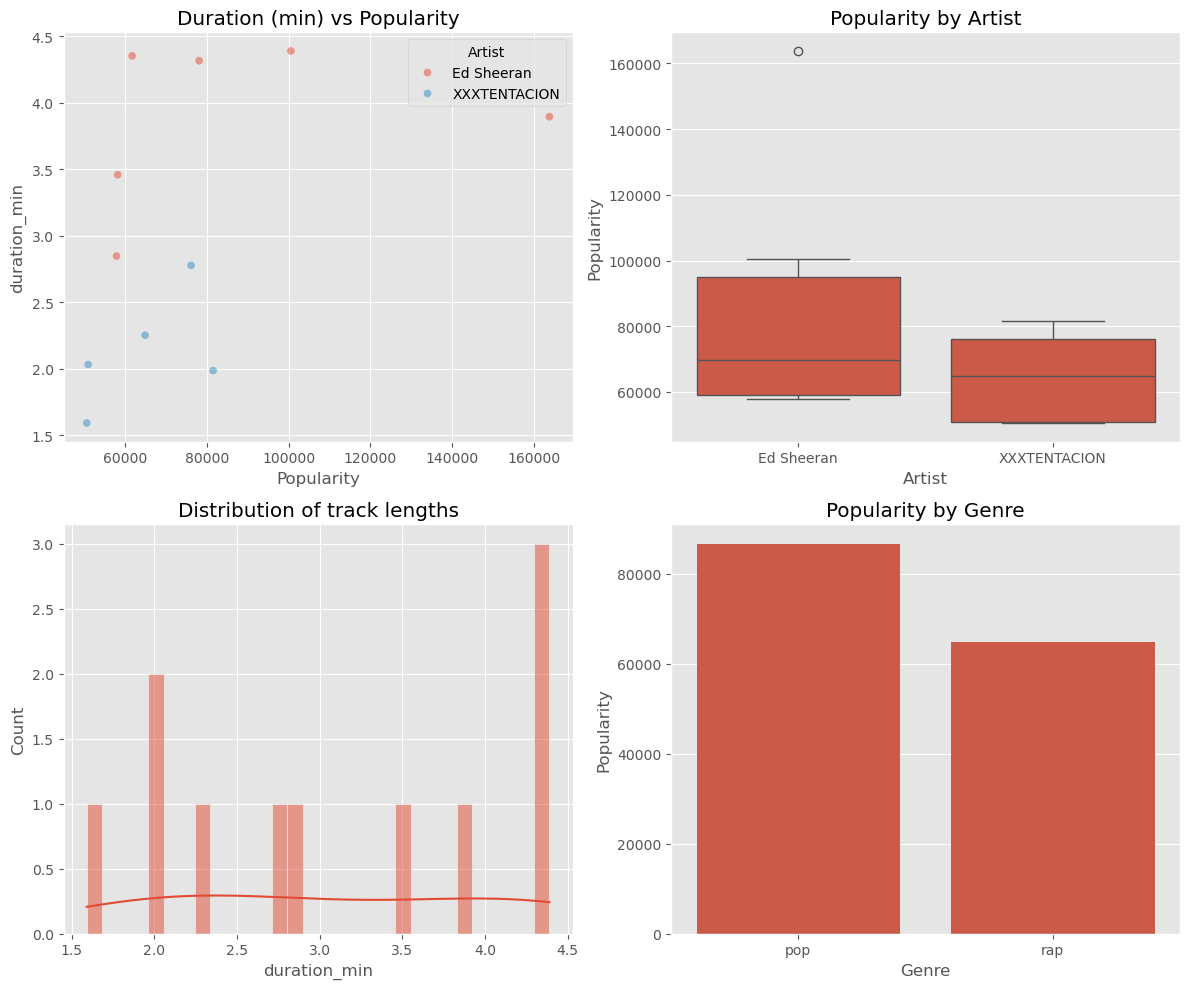

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(data=combined_df, x='Popularity', y='duration_min', hue='Artist', alpha=0.5, ax=axes[0, 0])
axes[0, 0].set_title("Duration (min) vs Popularity")

sns.boxplot(data=combined_df, x='Artist', y='Popularity', ax=axes[0, 1])
axes[0, 1].set_title("Popularity by Artist")

sns.histplot(combined_df['duration_min'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of track lengths")

sns.barplot(data=combined_df, x='Genre', y='Popularity', errorbar=None, ax=axes[1, 1])
axes[1, 1].set_title("Popularity by Genre")


plt.tight_layout()
plt.show()

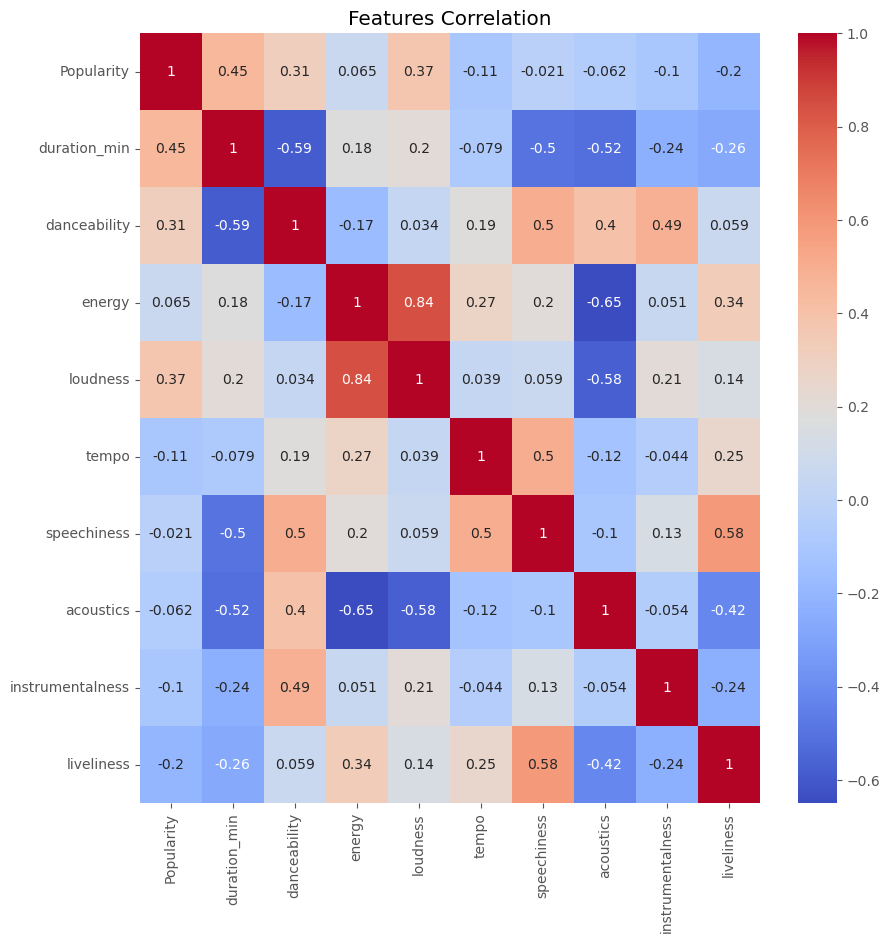

In [ ]:
correlation_matrix = combined_df[numeric_columns].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot= True, cmap= 'coolwarm')
plt.title('Features Correlation')
plt.show()

In [ ]:
# There is a moderate positive correlation between song length and its popularity. Most popular songs are around 3 minutes long.
# Ed Sheeran's songs generally have higher popularity than XXXTENTACION's tracks, suggesting that the artist's reputation plays a role.

# Final conclusions:

- The best time of year to release a hit is spring, or possibly summer.
- The genre with the highest likelihood of remaining a hit is pop.
- Danceable and energetic tracks have a greater chance of becoming hits. However, the theme of the lyrics doesn't have much impact.
- Definitely, the recognition and fame of the artist influence the song's success, and if the artist is not very popular, it’s worth collaborating with a more famous artist.
- Whether a song is a single or part of an album has little effect on its success.
- Hits are louder than other songs.


